Index(['sms', 'label'], dtype='object')
                                                 sms  label
0  Go until jurong point, crazy.. Available only ...      0
1                    Ok lar... Joking wif u oni...\n      0
2  Free entry in 2 a wkly comp to win FA Cup fina...      1
3  U dun say so early hor... U c already then say...      0
4  Nah I don't think he goes to usf, he lives aro...      0
Accuracy: 0.9721973094170404
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       954
           1       1.00      0.81      0.89       161

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



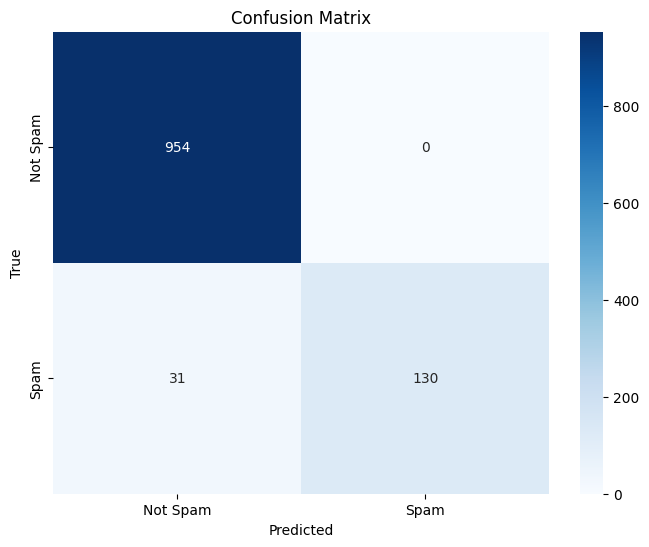

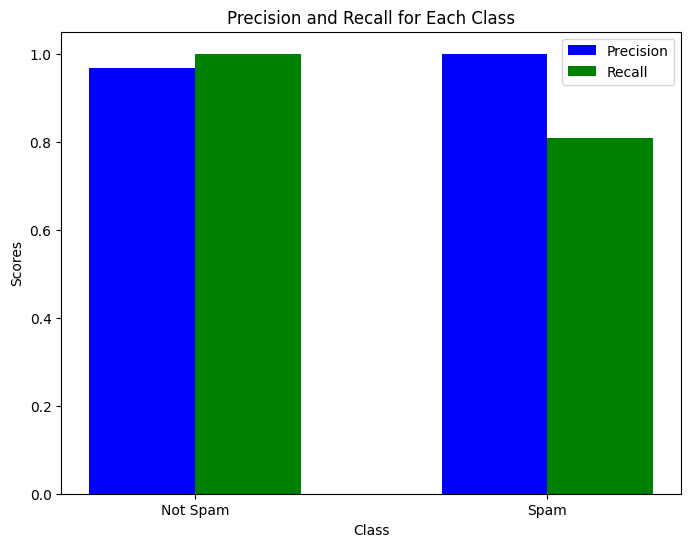

In [36]:
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Завантажуємо дані
data = pd.read_csv(r"C:\Users\Andrew\Downloads\train.csv")

# Перевіряємо структуру даних
print(data.columns)
print(data.head())

# Функція для попередньої обробки тексту
def preprocess_text(text):
    # Перетворюємо текст на нижній регістр
    text = text.lower()
    # Видаляємо пунктуацію
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Токенізація через пробіли
    words = text.split()
    return ' '.join(words)

# Застосовуємо попередню обробку до стовпця 'sms'
data['processed_sms'] = data['sms'].apply(preprocess_text)

# Векторизація тексту з використанням TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(data['processed_sms'])

# Мітки (спам або не спам)
y = data['label']

# Розділяємо на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створюємо і навчаємо модель Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model.predict(X_test)

# Оцінка якості моделі
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Побудова confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Візуалізація confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Графік розподілу точності для кожного класу
accuracy_per_class = classification_report(y_test, y_pred, output_dict=True)
labels = ['Not Spam', 'Spam']
precision = [accuracy_per_class['0']['precision'], accuracy_per_class['1']['precision']]
recall = [accuracy_per_class['0']['recall'], accuracy_per_class['1']['recall']]

x = range(len(labels))

# Створення графіку
fig, ax = plt.subplots(figsize=(8,6))
width = 0.3  # ширина стовпців
ax.bar(x, precision, width, label='Precision', color='b')
ax.bar([p + width for p in x], recall, width, label='Recall', color='g')

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall for Each Class')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()


Документація до коду: Класифікація спаму за допомогою Naive Bayes
Опис проекту:
Цей проект надає класифікацію повідомлень SMS за допомогою методу Naive Bayes. Повідомлення класифікуються як спам або не спам. Текст повідомлень попередньо обробляється, і для перетворення тексту в числові вектори використовується метод TF-IDF. Код також включає попередню обробку тексту, яка включає токенізацію та видалення пунктуації.

Структура коду:
Завантаження даних
Попередня обробка тексту
Векторизація тексту (TF-IDF)
Розбиття на тренувальні та тестові дані
Навчання моделі Naive Bayes
Оцінка моделі
Детальний опис коду:
1. Завантаження даних
python
Копіювати код
data = pd.read_csv(r"C:\Users\Andrew\Downloads\train.csv")
Опис: Цей рядок коду завантажує дані з файлу CSV, який містить текстові повідомлення в стовпці sms та мітки (спам або не спам) в стовпці label. Ви повинні вказати правильний шлях до вашого CSV файлу.
Важливість: Завантаження даних є початковим етапом для обробки тексту та навчання моделі.
2. Перевірка структури даних
python
Копіювати код
print(data.columns)
print(data.head())
Опис: Виводить назви стовпців та перші кілька рядків даних для перевірки структури файлу.
Важливість: Це допомагає перевірити, чи правильно завантажені дані та чи відповідають вони очікуваній структурі.
3. Попередня обробка тексту
python
Копіювати код
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    return ' '.join(words)
Опис: Функція для попередньої обробки тексту:
Перетворення в нижній регістр: Робить усі слова в тексті малими, що дозволяє зменшити варіативність (наприклад, "Spam" і "spam" розглядатимуться як однакові слова).
Видалення пунктуації: Використовує string.punctuation, щоб видалити всі знаки пунктуації.
Токенізація: Розбиває текст на окремі слова за допомогою методу split().
Важливість: Попередня обробка тексту дозволяє зменшити шуми в даних, покращити результати моделі та підготувати дані для подальшої векторизації.
4. Векторизація тексту (TF-IDF)
python
Копіювати код
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(data['processed_sms'])
Опис: Використовує TF-IDF векторизатор, щоб перетворити оброблений текст у числові вектори.
stop_words='english': Видаляє загальні слова (заповнювачі, такі як "the", "and", "is"), які не несуть значної інформації.
fit_transform: Створює матрицю термів (матриця рядків і стовпців, де кожен стовпець представляє термін, а значення — його вагу в документі).
Важливість: Перетворення тексту в числові дані дозволяє використовувати алгоритми машинного навчання для класифікації.
5. Розбиття на тренувальний та тестовий набори
python
Копіювати код
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Опис: Розбиває дані на тренувальну та тестову вибірки.
test_size=0.2: 20% даних використовується для тестування, а 80% — для тренування.
random_state=42: Це забезпечує відтворюваність результатів (необхідно для повторного запуску та тестування).
Важливість: Розбиття на тренувальні та тестові дані дозволяє оцінити ефективність моделі на нових, невидимих під час тренування даних.
6. Навчання моделі Naive Bayes
python
Копіювати код
model = MultinomialNB()
model.fit(X_train, y_train)
Опис: Створює та тренує модель Naive Bayes на тренувальних даних.
MultinomialNB(): Це клас, що реалізує наївний баєсовий класифікатор для багатокласових задач з числовими даними, такими як підсумки векторизації.
fit(X_train, y_train): Навчає модель на тренувальних даних.
Важливість: Наївний баєсовий класифікатор є одним з основних алгоритмів для класифікації тексту і широко використовується для задач спам-фільтрації.
7. Прогнозування та оцінка моделі
python
Копіювати код
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
Опис: Прогнозує мітки на тестових даних та оцінює модель.
predict(X_test): Робить прогноз на тестових даних.
accuracy_score(y_test, y_pred): Оцінює точність моделі, порівнюючи реальні мітки з передбаченими.
classification_report(y_test, y_pred): Генерує детальний звіт про точність, відновлення та F1-міру для кожного класу.
Важливість: Оцінка ефективності моделі дозволяє зрозуміти, наскільки добре вона справляється з класифікацією нових повідомлень.
